In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('../csv/movies_data_cleaned.csv')

In [3]:
movies_df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,runtime,vote_average,vote_count,credits,keywords,poster_path,recommendations
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9366.788,20th Century Studios-Lightstorm Entertainment,2022-12-14,192.0,7.751,6748.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,183392-111332-702432-505642-1064215-436270-874...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,103.0,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,594767,Shazam! Fury of the Gods,Action-Comedy-Fantasy,en,Billy Batson and his foster siblings who trans...,5759.074,New Line Cinema-The Safran Company-DC Films-Wa...,2023-03-15,130.0,6.840,1355.0,Zachary Levi-Asher Angel-Jack Dylan Grazer-Ada...,superhero-end of the world-super power-aftercr...,/2VK4d3mqqTc7LVZLnLPeRiPaJ71.jpg,700391-994751-948713-640146-502356-938992-7660...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4704.903,Marvel Studios-Kevin Feige Productions,2023-02-15,125.0,6.448,1547.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/ngl2FKBlU4fhbdsrtdom9LVLBXw.jpg,965839-734048-267805-1035806-823999-842942-772...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,116.0,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,965839-267805-943822-842942-1035806-823999-107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,448351,London 2012: Gymnastics - Going for the Gold,Documentary,en,At the 1996 Atlanta Games the Magnificent Seve...,0.600,NBC,2012-09-18,80.0,10.000,4.0,Gabby Douglas-McKayla Maroney-Aly Raisman-Kyla...,london england-gymnastics-olympic games,/cBBmS8IcmdAoEt6FfuyWH6Wzub.jpg,557800-2119
22396,520620,Party Talk,Drama,en,Four creative and sexually confused high schoo...,0.600,Oz River Productions,2015-04-08,90.0,9.000,6.0,Kevin J. Ford-Else Johnson-Krysten Kiyoko-May ...,new york city-dream-night life-american dream-...,/gfTP7eTiwWfcCcAF9tXeMmLUGMG.jpg,520629-520614-520599-520613-520607-520627-520590
22397,453770,And the Pain Remains,Drama,fr,100 years since the beginning of First World W...,0.600,Cutaway,2016-01-01,14.0,6.200,8.0,Nikola 'Kole' Angelovski-Dimitar Gjorgjievski,soldier-death-macedonia,/6RgAoXJIYBdRoLxP4955KNHBfsK.jpg,338517-341567-197057-49106-769362-90427-50826-...
22398,520590,The Love Club,Drama,en,A look at the lives of a group of teenage girl...,0.600,Henley Films,2011-04-12,12.0,9.800,4.0,William Holden-Daisy Werman-Hailey Wayman-Mia ...,high school-coming of age-teenage girl-teen mo...,/skZyasLj5A4xLRhHtfrs4iMEXZH.jpg,520613-520607-520627-520629-520620-520614-520599


In [4]:
movies_df['vote_average'].sort_values()

22282     0.0
19155     0.0
21815     0.0
22248     0.0
21823     0.0
         ... 
22357    10.0
22361    10.0
19662    10.0
20349    10.0
22249    10.0
Name: vote_average, Length: 22400, dtype: float64

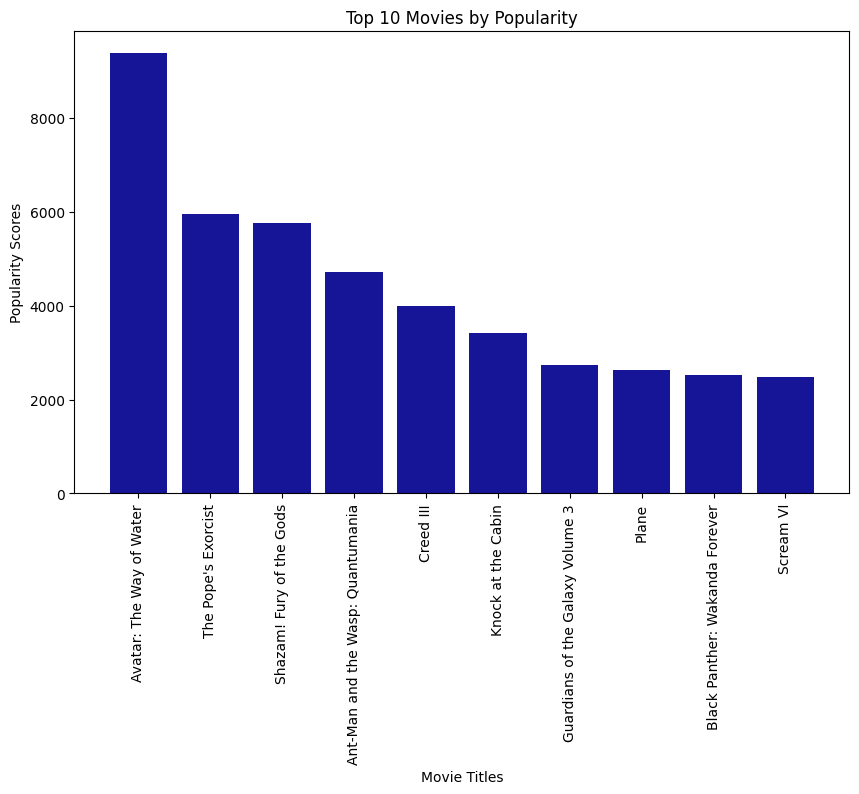

In [5]:
# Sort the DataFrame by popularity in descending order and select the top 10 movies
top_10_movies = movies_df.nlargest(10, 'popularity')

# Extract the movie titles and popularity scores for the top 10 movies
movie_titles = top_10_movies['title']
popularity_scores = top_10_movies['popularity']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(movie_titles, popularity_scores, color='#171597')
plt.xlabel('Movie Titles')
plt.ylabel('Popularity Scores')
plt.title('Top 10 Movies by Popularity')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Save the chart as an image file
plt.savefig('../graphs/movies_top_10_by_popularity.png')    

# Display the chart
plt.show()


In [6]:
movies_df['vote_count'].sort_values()

19155        0.0
3362         0.0
21815        0.0
22282        0.0
22201        0.0
          ...   
131      28260.0
75       28943.0
318      29330.0
178      30708.0
493      33262.0
Name: vote_count, Length: 22400, dtype: float64

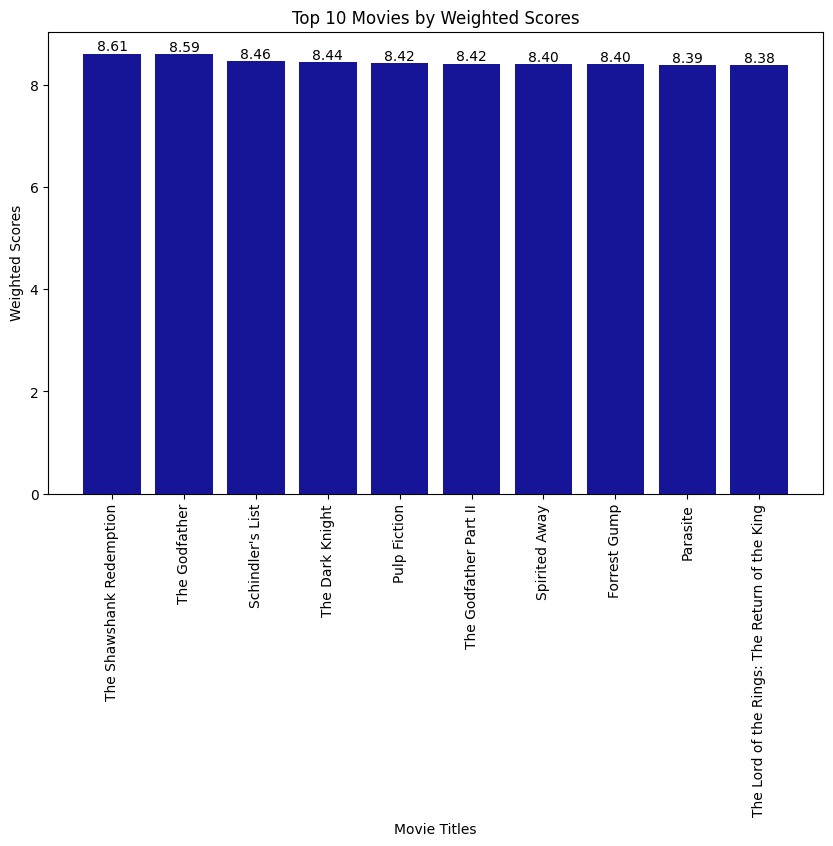

In [7]:
# Define the minimum number of votes required to be listed (threshold)
m = 1000

# Calculate the mean vote across the whole dataset
C = movies_df['vote_average'].mean()

# Calculate the weighted scores for each movie
movies_df['weighted_score'] = (movies_df['vote_count'] / (movies_df['vote_count'] + m)) * movies_df['vote_average'] + (m / (movies_df['vote_count'] + m)) * C

# Sort the DataFrame by weighted score in descending order
movies_df = movies_df.sort_values('weighted_score', ascending=False)

# Select the top 10 movies with the highest weighted scores
top_10_movies = movies_df.head(10)

# Extract the movie titles and weighted scores for the top 10 movies
movie_titles = top_10_movies['title']
weighted_scores = top_10_movies['weighted_score']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(movie_titles, weighted_scores, color='#171597')
plt.xlabel('Movie Titles')
plt.ylabel('Weighted Scores')
plt.title('Top 10 Movies by Weighted Scores')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Convert weighted_scores to a list for proper indexing
weighted_scores_list = weighted_scores.tolist()

# Attach the weighted scores as labels on the bars
for i, bar in enumerate(bars):
    score = weighted_scores_list[i]
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom')

# Save the chart as an image file
plt.savefig('../graphs/movies_weighted_scores_chart.png')    
    
# Display the chart
plt.show()


In [8]:
movies_df['first_genre'] = movies_df['genres'].str.split('-').str[0]


In [9]:
unique_genres = movies_df['first_genre'].unique().tolist()


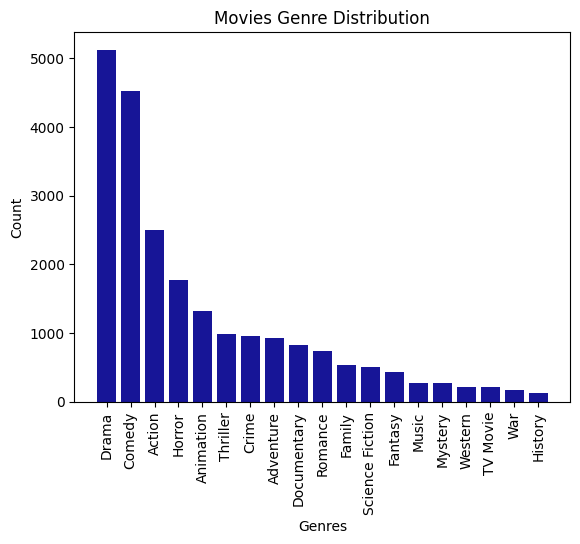

In [12]:
genre_counts = movies_df['first_genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values, color='#171597')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Movies Genre Distribution')
plt.xticks(rotation=90)

plt.savefig('../graphs/movies_genre_distribution_chart.png')    

plt.show()

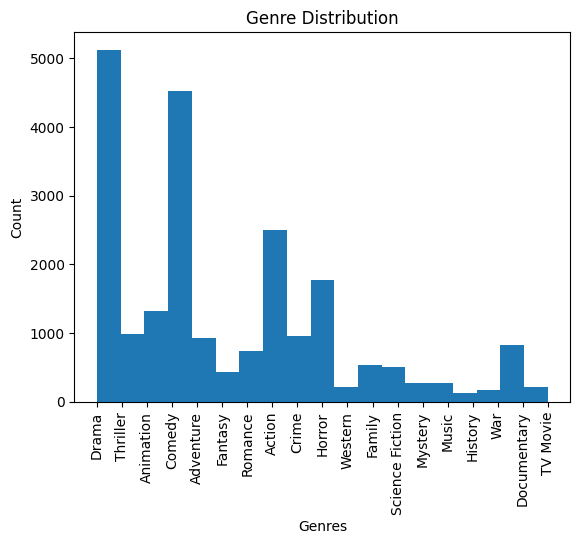

In [11]:

genre_counts = movies_df['first_genre'].value_counts()

plt.hist(movies_df['first_genre'], bins=len(genre_counts))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()
